# This code is used to automatically compare 4 ML Classification algorithms and display the results and the decision regions


In [61]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [62]:
def Initiate_Models(SVCKernel='linear',SVC_C=1.0,LogisticR_C=1000.0,random_state=1,criterion='gini',max_depth=4,random_forest_criterion='gini',n_estimators=10,n_jobs=2):
    SVM_Classifier = SVC(C=SVC_C,kernel=SVCKernel,random_state=random_state)
    LR_Classifier = LogisticRegression(C=LogisticR_C,random_state=random_state)
    DecisionTree = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth,random_state=random_state)
    RandomForest = RandomForestClassifier(criterion=random_forest_criterion,n_estimators=n_estimators,max_depth=max_depth,n_jobs=n_jobs)
    
    return SVM_Classifier,LR_Classifier,DecisionTree,RandomForest

In [63]:
def TransformData(x=None,y=None,test_size=30):
    Scaler = StandardScaler()
    Scaler.fit(x)
    X = Scaler.transform(x)
    xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=test_size,stratify=y)
    return xtrain,xtest,ytrain,ytest,X

In [64]:
def Get_Results(X=None,y=None,test_size=30,SVM_Classifier=None,LR_Classifier=None,DecisionTree=None,RandomForest=None):
    xtrain,xtest,ytrain,ytest,X = TransformData(x=X,y=y,test_size=30)
    
    SVM_Classifier.fit(xtrain,ytrain)
    LR_Classifier.fit(xtrain,ytrain)
    DecisionTree.fit(xtrain,ytrain)
    RandomForest.fit(xtrain,ytrain)
    
    SVM_Score = SVM_Classifier.score(X[105:150],y[105:150])
    LR_Score = LR_Classifier.score(X[105:150],y[105:150])
    Tree_Score = DecisionTree.score(X[105:150],y[105:150])
    Forest_score = RandomForest.score(X[105:150],y[105:150])
    
    print('SVM Score = ',SVM_Score)
    print('LR Score = ',LR_Score)
    print('Decision Tree Score = ',Tree_Score)
    print('Random Forest Score = ',Forest_score)
    
    print('')
    print('SVM Decision Regions')
    plot_decision_regions(X,y,SVM_Classifier)
    plt.show()
    print('Logistic Regression Decision Regions')
    plot_decision_regions(X,y,LR_Classifier)
    plt.show()
    print('Decision Tree Regions')
    plot_decision_regions(X,y,DecisionTree)
    plt.show()
    print('Random Forest Decision Regions')
    plot_decision_regions(X,y,RandomForest)
    plt.show()

In [65]:
def Compare_Models(X,y,test_size=30,SVCKernel='linear',SVC_C=1.0,LogisticR_C=1000.0,random_state=1,criterion='gini',max_depth=4,random_forest_criterion='gini',n_estimators=10,n_jobs=2):
    SVM_Classifier,LR_Classifier,DecisionTree,RandomForest = Initiate_Models(SVCKernel=SVCKernel,SVC_C=SVC_C,LogisticR_C=LogisticR_C,random_state=random_state,criterion=criterion,max_depth=max_depth,random_forest_criterion=random_forest_criterion,n_estimators=n_estimators,n_jobs=n_jobs)
    Get_Results(X=X,y=y,test_size=test_size,SVM_Classifier=SVM_Classifier,LR_Classifier=LR_Classifier,DecisionTree=DecisionTree,RandomForest=RandomForest)
    

# Testing using the iris dataset

In [66]:
from sklearn.datasets import load_iris
iris = load_iris()
y = iris.target
#input is only 2 features
X = iris.data[:, [1, 3]]

C:\Users\NEWTECH\Anaconda3\envs\venv\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\NEWTECH\Anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\NEWTECH\Anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


SVM Score =  0.9111111111111111
LR Score =  0.9333333333333333
Decision Tree Score =  0.8666666666666667
Random Forest Score =  0.8888888888888888

SVM Decision Regions


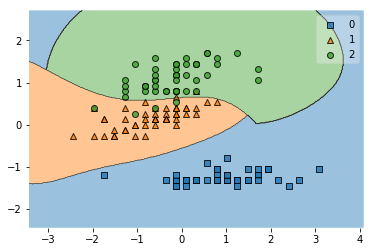

Logistic Regression Decision Regions


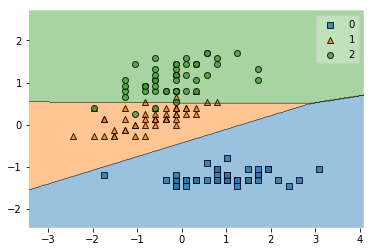

Decision Tree Regions


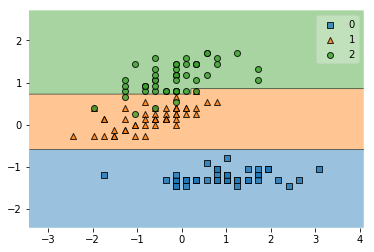

Random Forest Decision Regions


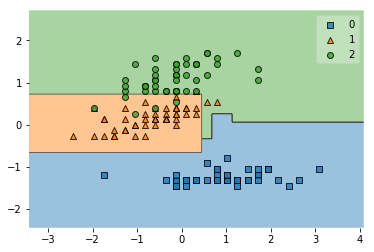

In [67]:
Compare_Models(X,y,30,'rbf',1.0,1000.0,1,'gini',4,'gini',10,2)